In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.stats import norm
import scipy.constants as scp
from tabulate import tabulate

---

# Import & grafische Darstellung

In [2]:
#Auslesung der Txt-Datei:
t,x,y=np.loadtxt('./position_data_4.txt', delimiter=",", 
                 dtype="float", unpack=True)

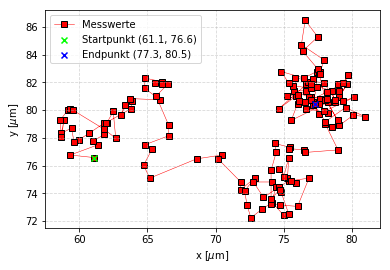

In [14]:
#grafische Darst.:
plt.plot(x, y, marker='s', color='red', mec='k', linewidth=0.5, zorder=1, label='Messwerte')
plt.xlabel('x '+'[$\mu$'+'m]')
plt.ylabel('y '+'[$\mu$'+'m]')
plt.grid(alpha=0.5, linestyle='--')
plt.scatter(x[0], y[0], marker='x', color='lime', zorder=2, 
            label='Startpunkt ({:.3}, {:.3})'.format(x[0],y[0]))
plt.scatter(x[-1], y[-1], marker='x', color='blue', zorder=2, 
            label='Endpunkt ({:.3}, {:.3})'.format(x[-1],y[-1]))
plt.legend()
plt.savefig('./output/brown1.pdf', format='PDF')

# Mittleres Verschiebungsquadrat & Fehler

In [4]:
#Mittleres Verschiebungsquadrat:
dt=np.array([])
dx=np.array([])
dy=np.array([])
i=0
while i < len(t)-1:
    dx=np.append(dx,x[i+1]-x[i])
    dy=np.append(dy,y[i+1]-y[i])
    i = i + 1
r_squared=dx**2+dy**2
    
r_squared_mean=np.mean(r_squared)
print("r_squared_mean= " ,r_squared_mean)
r_squared_mean_std=np.std(r_squared)/np.sqrt(len(r_squared))
print("r_squared_mean_std= " ,r_squared_mean_std)

r_squared_mean=  1.80451085060604
r_squared_mean_std=  0.157379673457268


In [5]:
#Messwerte:
eta = 9.45 * 10**(-4) #Pa s
deta = 0.05 * 10**(-4)

a = 0.5 * 10**(-9) * 755 #m
da = 0.5 * 10**(-9) * 30

T = 273.15 + 22.5 #K
dT = 0.1

#Boltzmann:
k_1 = 6 * np.pi * eta * a * r_squared_mean * 10**(-12) /(4 * T)
dk_1 = k_1 * np.sqrt((r_squared_mean_std/r_squared_mean)**2 + (deta/eta)**2 + (da/a)**2 + (dT/T)**2)

#Diffusionskoeff:
D_1 = k_1 * T /(6 * np.pi * eta * a)
dD_1 = D_1 * np.sqrt((dk_1/k_1)**2 + (deta/eta)**2 + (da/a)**2 + (dT/T)**2)

print('D_1 =', D_1, '+/-', dD_1)
print('k_B,1 =', k_1, '+/-', dk_1)

D_1 = 4.5112771265151e-13 +/- 4.692673571591438e-14
k_B,1 = 1.0260570546896344e-23 +/- 9.848743165952586e-25


In [6]:
#Literaturwert:
k_lit = 1.380649 * 10**(-23)

In [7]:
#Signifikanztest:
sign1lit = np.abs(k_1 - k_lit)/dk_1

print('Signifikanztest =', sign1lit)

Signifikanztest = 3.600377625199946


In [8]:
#Super coole und super nützliche Tabelle:
head = ['Nr.', 'dx', 'dy', 'r^2']
tab = zip(np.arange(1, 150), np.round(dx, 2), np.round(dy, 2), np.round(r_squared, 2))

#print(tabulate(tab, headers=head, tablefmt="latex"))

# Kontrollverteilung

MW = 0.06742291946308725
Std = 0.9474753691965264


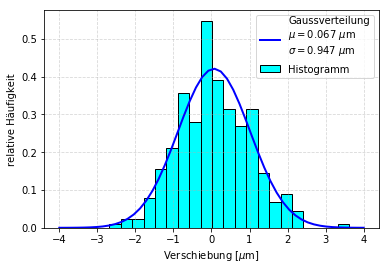

In [9]:
all_data=np.append(dx,dy)
binwidth = 0.3
mu = np.mean(all_data)
sigma = np.std(all_data)
gauss = norm.pdf(np.linspace(-4, 4), mu, sigma)

plt.hist(all_data, 
         bins=np.arange(min(all_data), max(all_data) + binwidth, binwidth),
         edgecolor='k',
         facecolor='cyan',
         density=True,
        label='Histogramm')
plt.xlabel('Verschiebung '+'[$\mu$'+'m]')
plt.ylabel('relative Häufigkeit')
plt.grid(alpha=0.5, linestyle='--')
plt.plot(np.linspace(-4,4), gauss, '-b', linewidth=2, 
         label='\n'.join(['Gaussverteilung', 
                         r'$\mu = {:.3f} \ \mu$m'.format(mu),
                         r'$\sigma= {:.3f} \ \mu$m'.format(sigma)]))
plt.legend()
plt.savefig('./output/brown2.pdf', format='PDF')

print('MW =', mu)
print('Std =', sigma)

# Kummulative Verteilung der Verschiebungsquadrate

Text(0, 0.5, 'Summe $r_i^2 \\ [\\mu m^2]$')

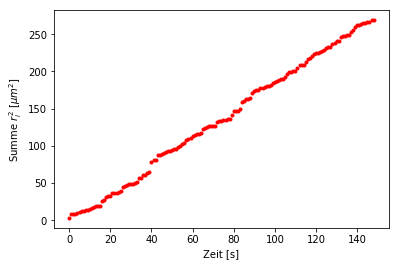

In [10]:
r_kumm=np.cumsum(r_squared)
plt.plot(t[:-1], r_kumm, marker='.', color='red', linewidth=0)
plt.xlabel('Zeit [s]')
plt.ylabel('Summe $r_i^2 \ [\mu m^2]$')

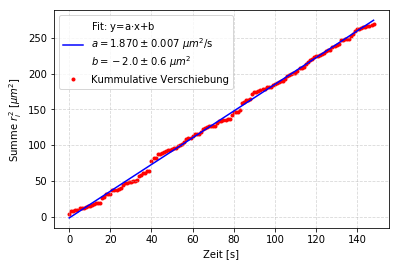

In [11]:
#Fit:
def linear(x,a,b):
    return a*x+b

popt, pcov = curve_fit(linear, t[:-1], r_kumm)

plt.grid(alpha=0.5, linestyle='--')
plt.plot(t[:-1], linear(t[:-1],*popt), color='blue', linewidth=1.5, zorder=2,
         label="\n".join(["Fit: y=a$\cdot$x+b", 
                          r'$a={:.3f}\pm{:.1} \ \mu m^2$/s'.format(popt[0], np.sqrt(pcov[0][0])), 
                          r'$b={:.1f}\pm{:.1} \ \mu m^2$'.format(popt[1], np.sqrt(pcov[1][1]))]))
plt.plot(t[:-1], r_kumm, marker='.', color='red', linewidth=0, zorder=1,
         label='Kummulative Verschiebung')
plt.xlabel('Zeit [s]')
plt.ylabel('Summe $r_i^2 \ [\mu m^2]$')
plt.legend()
plt.savefig('./output/brown3.pdf', format='PDF')

In [12]:
#Berechne k_B und D:
grad = popt[0] * 10**(-12) #m^2/s
dgrad = np.sqrt(pcov[0][0]) * 10**(-12)

D_2 = grad/4
dD_2 = dgrad/4

k_2 = D_2 * 6 * np.pi * eta * a /T
dk_2 = k_2 * np.sqrt((dD_2/D_2)**2 + (deta/eta)**2 + (da/a)**2 + (dT/T)**2)

print('D_2 =', D_2, '+/-', dD_2)
print('k_B,2 =', k_2, '+/-', dk_2)

D_2 = 4.675075034519166e-13 +/- 1.7564206997082691e-15
k_B,2 = 1.0633116933069707e-23 +/- 4.28120270803471e-25


In [13]:
#Signifikanztest literatur:
sign2lit = np.abs(k_2 - k_lit)/dk_2

#Sign. werte oben:
signk = np.abs(k_1 - k_2)/np.sqrt(dk_1**2 + dk_2**2)
signD = np.abs(D_1 - D_2)/np.sqrt(dD_1**2 + dD_2**2)

print('Sigma k2 lit =', sign2lit)
print('Sigma k1 k2 =', signk)
print('Sigma D1 D2 =', signD)

Sigma k2 lit = 7.412340137444773
Sigma k1 k2 = 0.34690927761398943
Sigma D1 D2 = 0.3488060510170774
